In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TUXML_CSV_FILENAME="./config_bdd.csv"

# sanity check CSV
with open(TUXML_CSV_FILENAME, "r") as file:
    k = file.readline()
    t = k.split(",")
    s = set(t)
    assert(len(t) == len(s)) # unique number of options/features/column names

# parsing for real with pandas 
rawtuxdata = pd.read_csv(open(TUXML_CSV_FILENAME, "r"))

basic_head = ["cid", "time"] # "compile"
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]

tri_state_values = ['y', 'n', 'm']

ftuniques = []
freq_ymn_features = []
non_tristate_options = []

for col in rawtuxdata:
    ft = rawtuxdata[col]    
    # eg always "y"
    if len(ft.unique()) == 1:
        ftuniques.append(col)
    # only tri-state values (y, n, m) (possible TODO: handle numerical/string options)    
    elif all(x in tri_state_values for x in ft.unique()):     #len(ft.unique()) == 3: 
        freq = ft.value_counts(normalize=True)
        freqy = 0
        freqn = 0
        freqm = 0
        if ('y' in freq.index):
            freqy = freq['y']
        if ('n' in freq.index):
            freqn = freq['n']
        if ('m' in freq.index):
            freqm = freq['m']
        freq_ymn_features.append((col, freqy, freqm, freqn))
        # categorical variable
        #if tuxdata[col].dtype == 'object':
        #    try:
        #        tuxdata[col] = tuxdata[col].astype('category')
        #    except:
        #        print('Column', ' ', col, ' cannot be converted to category.')
    else:
        if not (col in size_methods): 
            non_tristate_options.append(col)
        

### TODO: we want to keep all quantitative values!
# non_tristate_options.remove('LZO') # ('vmlinux')

# we want to keep measurements (that are not tristate ;)) 
# non_tristate_options = list(set(non_tristate_options) - set(size_methods))

#### print options with unique values
# options with only one value eg always "y"
#i = 0
#for ft in ftuniques:
#    print(ft + " (" + str(i) + ")")
#    i = i + 1

print("Original size (#configs/#options) of the dataset " + str(rawtuxdata.shape))
print ("Number of options with only one value (eg always y): " + str(pd.DataFrame(ftuniques).shape))

# maybe we can drop options with only one unique value (no interest for machine learning)
rawtuxdata.drop(columns=ftuniques,inplace=True)

print ("Non tri-state value options (eg string or integer or hybrid values): " 
       + str(pd.DataFrame(non_tristate_options).shape) + " ") 
#      + str(pd.DataFrame(non_tristate_options)))

print ("Predictor variables: " + str(rawtuxdata.drop(columns=non_tristate_options).columns.size))
# frequency of y, m, and n values 
#plt.figure()
#pd.DataFrame(freq_ymn_features, columns=["feature", "freqy", "freqm", "freqn"]).plot(kind='hist', alpha=0.8) #plot()
#plt.show()


    



/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1150,6015,6026,6717,7350,7676,7726,9949,10442) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Original size (#configs/#options) of the dataset (11538, 12798)
Number of options with only one value (eg always y): (3134, 1)
Non tri-state value options (eg string or integer or hybrid values): (173, 1) 
Predictor variables: 9491


In [2]:
rawtuxdata[rawtuxdata['X86_64'] == 'n']

cid                 date      time  vmlinux  GZIP-bzImage  \
6094  70713  2018-07-02 11:30:52  29.19220  1168072        466672   
6096  70715  2018-07-02 11:46:20   4.01781       -1            -1   
6097  70716  2018-07-02 11:48:23   3.17844       -1            -1   
6098  70717  2018-07-02 11:50:14  27.70240  1168072        466672   
6107  70730  2018-07-02 16:11:07  29.26880  1168072        466672   
6108  70731  2018-07-02 16:12:20  27.41670  1168072        466672   

      GZIP-vmlinux    GZIP  BZIP2-bzImage  BZIP2-vmlinux   BZIP2  \
6094        458720  431204         429760         420864  405663   
6096            -1      -1             -1             -1      -1   
6097            -1      -1             -1             -1      -1   
6098        458720  431202         429760         420864  405662   
6107        458720  431204         429808         420912  405708   
6108        458720  431203         429792         420904  405703   

             ...           SND_SOC_INTEL_SKL_NAU88L25_SSM4567_MACH  APDS9960  \
6094         ...                                                 n         n   
6096         ...                                                 n         n   
6097         ...                                                 n         n   
6098         ...                                                 n         n   
6107         ...                                                 n         n   
6108         ...                                                 n         n   

      ARCH_SUPPORTS_INT128  SLABINFO  MICROCODE_AMD  ISDN_DRV_HISAX  \
6094                     n         n              n               n   
6096                     n         n              n               n   
6097                     n         n              n               n   
6098                     n         n              n               n   
6107                     n         n              n               n   
6108                     n         n              n               n   

      CHARGER_BQ24190  SND_SOC_NAU8825  BH1750  NETWORK_FILESYSTEMS  
6094                n                n       n                    n  
6096                n                n       n                    n  
6097                n                n       n                    n  
6098                n                n       n                    n  
6107                n                n       n                    n  
6108                n                n       n                    n  

[6 rows x 9664 columns]

In [3]:
rawtuxdata[rawtuxdata['vmlinux'] == 1168072][['cid', 'CC_OPTIMIZE_FOR_SIZE', 'DEBUG_INFO_DWARF4', 'KASAN', 'UBSAN_ALIGNMENT', 'X86_NEED_RELOCS', 'RANDOMIZE_BASE', 'GCOV_PROFILE_ALL', 'UBSAN_SANITIZE_ALL', 'DEBUG_INFO', 'MODULES', 'DEBUG_INFO_REDUCED', 'DEBUG_INFO_SPLIT']]

cid CC_OPTIMIZE_FOR_SIZE DEBUG_INFO_DWARF4 KASAN UBSAN_ALIGNMENT  \
6094  70713                    y                 n     n               n   
6098  70717                    y                 n     n               n   
6107  70730                    y                 n     n               n   
6108  70731                    y                 n     n               n   

     X86_NEED_RELOCS RANDOMIZE_BASE GCOV_PROFILE_ALL UBSAN_SANITIZE_ALL  \
6094               n              n                n                  n   
6098               n              n                n                  n   
6107               n              n                n                  n   
6108               n              n                n                  n   

     DEBUG_INFO MODULES DEBUG_INFO_REDUCED DEBUG_INFO_SPLIT  
6094          n       n                  n                n  
6098          n       n                  n                n  
6107          n       n                  n                n  
6108          n       n                  n                n

In [4]:
rawtuxdata[rawtuxdata['vmlinux'] == -1]

cid                 date     time  vmlinux  GZIP-bzImage  \
9      64519  2018-06-27 20:44:05  480.489       -1            -1   
17     64527  2018-06-27 20:45:35  619.328       -1            -1   
38     64548  2018-06-27 20:48:15  495.525       -1            -1   
54     64564  2018-06-27 20:50:45  246.208       -1            -1   
67     64577  2018-06-27 20:52:27  377.385       -1            -1   
68     64578  2018-06-27 20:52:32  255.326       -1            -1   
84     64594  2018-06-27 20:54:01  396.363       -1            -1   
85     64595  2018-06-27 20:54:01  257.207       -1            -1   
99     64609  2018-06-27 20:57:15  296.149       -1            -1   
145    64655  2018-06-27 21:03:46  192.264       -1            -1   
160    64670  2018-06-27 21:06:13  467.175       -1            -1   
171    64681  2018-06-27 21:08:06  290.393       -1            -1   
183    64693  2018-06-27 21:09:48  319.913       -1            -1   
198    64708  2018-06-27 21:11:58  440.333       -1            -1   
230    64740  2018-06-27 21:16:18  224.383       -1            -1   
279    64789  2018-06-27 21:23:43  245.531       -1            -1   
281    64791  2018-06-27 21:24:41  686.052       -1            -1   
290    64800  2018-06-27 21:26:19  472.803       -1            -1   
370    64880  2018-06-27 21:38:03  256.676       -1            -1   
374    64884  2018-06-27 21:38:33  286.337       -1            -1   
406    64916  2018-06-27 21:42:43  348.044       -1            -1   
423    64933  2018-06-27 21:45:08  249.359       -1            -1   
470    64980  2018-06-27 21:51:45  290.501       -1            -1   
482    64992  2018-06-27 21:53:20  332.000       -1            -1   
490    65000  2018-06-27 21:54:23  294.762       -1            -1   
492    65002  2018-06-27 21:55:24  295.778       -1            -1   
507    65017  2018-06-27 21:57:15  347.992       -1            -1   
519    65029  2018-06-27 21:58:55  323.043       -1            -1   
549    65059  2018-06-27 22:02:52  276.799       -1            -1   
551    65061  2018-06-27 22:02:56  372.565       -1            -1   
...      ...                  ...      ...      ...           ...   
11074  75746  2018-07-07 12:26:14  326.949       -1            -1   
11082  75754  2018-07-07 12:34:16  460.303       -1            -1   
11086  75758  2018-07-07 12:38:30  362.697       -1            -1   
11092  75764  2018-07-07 12:42:47  275.927       -1            -1   
11094  75766  2018-07-07 12:45:25  585.724       -1            -1   
11096  75768  2018-07-07 12:48:26  310.865       -1            -1   
11140  75812  2018-07-07 13:36:21  544.425       -1            -1   
11194  75866  2018-07-07 14:32:28  220.968       -1            -1   
11247  75919  2018-07-07 15:29:05  326.845       -1            -1   
11265  75937  2018-07-07 15:45:23  328.721       -1            -1   
11273  75945  2018-07-07 15:52:49  361.677       -1            -1   
11279  75951  2018-07-07 15:58:30  351.379       -1            -1   
11293  75965  2018-07-07 16:13:35  282.731       -1            -1   
11313  75985  2018-07-07 16:38:52  685.366       -1            -1   
11314  75986  2018-07-07 16:39:00  444.500       -1            -1   
11323  75995  2018-07-07 16:49:49  224.899       -1            -1   
11329  76001  2018-07-07 17:00:20  663.842       -1            -1   
11367  76039  2018-07-09 10:54:35  573.426       -1            -1   
11368  76040  2018-07-09 10:55:03  236.624       -1            -1   
11387  76059  2018-07-09 11:13:15  331.872       -1            -1   
11398  76070  2018-07-09 11:25:02  317.047       -1            -1   
11399  76071  2018-07-09 11:25:42  405.435       -1            -1   
11434  76106  2018-07-09 12:00:45  308.883       -1            -1   
11442  76114  2018-07-09 12:08:06  337.570       -1            -1   
11454  76126  2018-07-09 12:19:18  407.106       -1            -1   
11460  76132  2018-07-09 12:23:38  291.561       -1            -1   
11463  

In [5]:
rawtuxdata[rawtuxdata['vmlinux'] == 1168072]['MODULES']

6094    n
6098    n
6107    n
6108    n
Name: MODULES, dtype: object

In [6]:
# playing a bit with the data 
rawtuxdata.dtypes
# 'DEBUG_INFOO' in list(pd.DataFrame(non_tristate_options)[0]) # 
# tuxdata['DEBUG_INFO'].unique()
#tuxdata['OUTPUT_FORMAT'].dtypes
#tuxdata['DEFAULT_HOSTNAME'].unique()

#rawtuxdata[:5]
rawtuxdata[:20]['vmlinux']
#tuxdata[:5]['CONFIG_DEBUG_INFO']
#tuxdata['ARCH_HAS_SG_CHAIN'].unique()
#tuxdata['ARCH_HAS_SG_CHAIN'].astype('category')

0      30880200
1      53875520
2      18772696
3      24147496
4     230285584
5      69676088
6      35061024
7      89176752
8      32526392
9            -1
10     39675592
11     66906576
12     27363432
13     53800928
14     47768152
15     89392680
16     45488728
17           -1
18     20366504
19     13354128
Name: vmlinux, dtype: int64

In [7]:
rawtuxdata.shape, rawtuxdata[rawtuxdata['vmlinux'] != -1].shape, 

((11538, 9664), (10832, 9664))

In [8]:
from sklearn.preprocessing import *
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


LEARN_COMPILATION_SUCCESS = False # costly in time and space 
compilation_status_column_name = 'compile_success'

def encode_data_compilation(rawtuxdata):
    lae = LabelEncoder()
    # we save quantitative values we want (here vmlinux, TODO: generalize)
    # the key idea is that the labelling encoder should not be applied to this kind of values (only to predictor variables!)
    # vml = rawtuxdata['LZO'] # rawtuxdata['vmlinux'] 
    o_sizes = rawtuxdata[size_methods]

    # we remove non tri state options, but TODO there are perhaps some interesting options (numerical or string) here
    #tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=['vmlinux']).apply(le.fit_transform)
    tuxdata_for_compilation = rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(lae.fit_transform)

    #tuxdata['vmlinux'] = vml 
    tuxdata_for_compilation[size_methods] = o_sizes
    # we can ue vmlinux since it has been restored thanks to previous line
    tuxdata_for_compilation[compilation_status_column_name] = tuxdata_for_compilation['vmlinux'] != -1
    return tuxdata_for_compilation

def learn_compilation_success(tuxdata_for_compilation):
    TESTING_SIZE=0.3 
    X_train, X_test, y_train, y_test = train_test_split(tuxdata_for_compilation.drop(columns=size_methods).drop(columns=compilation_status_column_name), tuxdata_for_compilation[compilation_status_column_name], test_size=TESTING_SIZE, random_state=0)  
    clf = GradientBoostingClassifier(n_estimators=100) #RandomForestRegressor(n_estimators=100) #   #GradientBoostingRegressor(n_estimators=100)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]    

    TOP_FT_IMPORTANCE=20
    print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
    for f in range(TOP_FT_IMPORTANCE): # len(indices)
        print("%d. feature %s %d (%f)" % (f + 1, tuxdata_for_compilation.columns[indices[f]], indices[f], importances[indices[f]]))

    acc = accuracy_score (y_test, y_pred)
    prec = precision_score (y_test, y_pred)
    reca = recall_score (y_test, y_pred)
    f1 = f1_score (y_test, y_pred)
    print("Accuracy score: %.2f" % (acc))
    print("Precision score: %.2f" % (prec))
    print("Recall score: %.2f" % (reca))
    print("F1 score: %.2f" % (f1))

if (LEARN_COMPILATION_SUCCESS):
    tuxdata_for_compilation = encode_data_compilation(rawtuxdata)
    tuxdata_for_compilation [compilation_status_column_name].describe()
    learn_compilation_success(tuxdata_for_compilation)

In [9]:
# remove entries with same configurations
print(str(len(rawtuxdata)) + " before the removal of some entries (those with same configurations)")
# tuxdata.drop_duplicates(subset=tuxdata.columns.difference(['vmlinux']), inplace=True)
#TODO: seems not working 
rawtuxdata.drop_duplicates(subset=rawtuxdata.columns.difference(size_methods), inplace=True)
print(str(len(rawtuxdata)) + " after the removal of some entries (those with same configurations)")

#n_failures = len(tuxdata[~np.isnan(tuxdata['vmlinux'])])
n_failures = len(rawtuxdata[rawtuxdata['vmlinux'] == -1]) #len(tuxdata[np.isnan(tuxdata['vmlinux'])])
print(str(n_failures) + " failures out of " + str(len(rawtuxdata)))

#tuxdata = tuxdata[~np.isnan(tuxdata['vmlinux'])]
rawtuxdata = rawtuxdata[rawtuxdata['vmlinux'] != -1] #tuxdata[~np.isnan(tuxdata['vmlinux'])]
print(str(len(rawtuxdata)) + " after the removal of configurations that do NOT compile")



#tuxdata["vmlinux"]
#tuxdata.where(tuxdata["vmlinux"] == np.NaN)

#tuxdata[tuxdata["vmlinux"] != -1]
#tuxdata
#tuxdata[tuxdata['vmlinux'] != -1].shape

11538 before the removal of some entries (those with same configurations)
11538 after the removal of some entries (those with same configurations)
706 failures out of 11538
10832 after the removal of configurations that do NOT compile


In [10]:
print("some configurations have X86_32 (coz we have tested/tried some options and there are in the database)", rawtuxdata['X86_64'].describe())
# we only keep X86_64 configurations
rawtuxdata = rawtuxdata[rawtuxdata['X86_64'] == 'y']

some configurations have X86_32 (coz we have tested/tried some options and there are in the database) count     10832
unique        2
top           y
freq      10828
Name: X86_64, dtype: object


<Figure size 432x288 with 0 Axes>

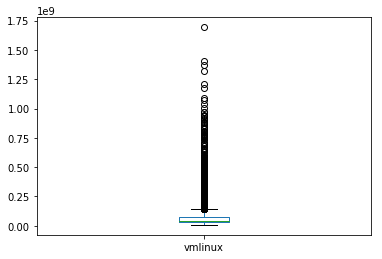

<Figure size 432x288 with 0 Axes>

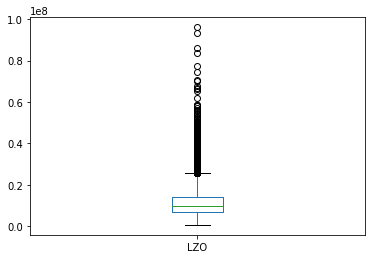

<Figure size 432x288 with 0 Axes>

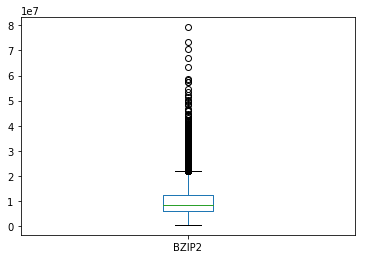

count    1.082800e+04
mean     7.139951e+07
std      9.230716e+07
min      7.317008e+06
25%      2.923826e+07
50%      4.389003e+07
75%      7.448915e+07
max      1.693674e+09
Name: vmlinux, dtype: float64

In [11]:
plt.figure()
pd.DataFrame(rawtuxdata['vmlinux']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(rawtuxdata['LZO']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(rawtuxdata['BZIP2']).plot.box()
plt.show(block=False)


rawtuxdata['vmlinux'].describe()


In [12]:
import scipy.stats
import seaborn as sns



def color_negative_positive(val, pcolor="green", ncolor="red"):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = pcolor if val > 0 else ncolor 
    if val == 0:
        color = 'black' 
    return 'color: %s' % color

compress_methods = ["GZIP", "BZIP2", "LZMA", "XZ", "LZO", "LZ4"]
def compareCompress(size_measure_of_interest): #"" # "-vmlinux" #"-bzImage" # prefix
    rCompressDiff = pd.DataFrame(index=list(map(lambda c: c + "o", compress_methods)) , columns=compress_methods) 
    for compress_method in compress_methods:
        for compress_method2 in compress_methods:
            rCompressDiff.loc[compress_method + "o"][compress_method2] = (np.mean(rawtuxdata[compress_method + size_measure_of_interest] / rawtuxdata[compress_method2 + size_measure_of_interest]) * 100) - 100
    return rCompressDiff

#cmy = sns.light_palette("red", as_cmap=True)
compareCompress("").style.set_caption('Difference (average in percentage) per compression methods').applymap(color_negative_positive)

#(rawtuxdata["XZ-vmlinux"] - rawtuxdata["BZIP2-vmlinux"]).plot.box()
# n_size_methods = len(size_methods)
#corr_sizes = [[0 for x in range(n_size_methods)] for y in range(n_size_methods)]
#i = 0
#j = 0
#for size_method in size_methods:
#    csize = rawtuxdata[size_method]   
#    for osize_method in size_methods:
#        if size_method != osize_method:
#            osize = rawtuxdata[osize_method]           
#            pcorr = scipy.stats.pearsonr(csize, osize)[0]
#            corr_sizes[i][j] = pcorr
#        j = j + 1
#    i = i + 1

In [13]:
compareCompress("-bzImage").style.set_caption('Difference (average in percentage) per compression methods, bzImage').applymap(color_negative_positive)


In [14]:
compareCompress("-vmlinux").style.set_caption('Difference (average in percentage) per compression methods, vmlinux').applymap(color_negative_positive)


In [15]:
cm = sns.light_palette("green", as_cmap=True)
pd.DataFrame.corr(rawtuxdata[size_methods]).style.set_caption('Correlations between size measures').background_gradient(cmap=cm)


In [16]:
#from category_encoders import *
from sklearn.preprocessing import *

#X = [['y', 1], ['n', 3], ['m', 2]]
#enc.fit(X)
#enc.transform(tuxdata)

#enc = OrdinalEncoder().fit(tuxdata[:10])

# transform the dataset
#enc.transform(tuxdata[:10])

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
#print(non_tristate_options)

# we save quantitative values we want (here vmlinux, TODO: generalize)
# the key idea is that the labelling encoder should not be applied to this kind of values (only to predictor variables!)
# vml = rawtuxdata['LZO'] # rawtuxdata['vmlinux'] 
vml = rawtuxdata[size_methods]

# we remove non tri state options, but TODO there are perhaps some interesting options (numerical or string) here
#tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=['vmlinux']).apply(le.fit_transform)
tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(le.fit_transform)

#tuxdata['vmlinux'] = vml 
tuxdata[size_methods] = vml
# tuxdata['vmlinux'].astype('int64')

# example: DEBUG_INFO is either y or n
tuxdata['DEBUG_INFO'].unique()

array([0, 1])

In [17]:
#print ("Warning, we only focus on configurations without DEBUG_INFO ")
#tuxdata = tuxdata[tuxdata['DEBUG_INFO'] == le.transform(['n'])[0]]

In [18]:
tuxdata.shape

(10828, 9491)

In [19]:
# One-Hot-Encoding 
#from sklearn.preprocessing import *

#enc = OneHotEncoder()
#o_sizes = tuxdata[size_methods]
#oh_tuxdata = enc.fit_transform(tuxdata)
#oh_tuxdata.shape, o_sizes.shape
# rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(enc.fit_transform)
#oh_tuxdata[size_methods] = o_sizes

In [20]:
#o_sizes = tuxdata[size_methods]
#tuxdata_dummy = pd.get_dummies(tuxdata.drop(columns=size_methods), columns=tuxdata.drop(columns=size_methods).columns)
#tuxdata_dummy[size_methods] = o_sizes
#tuxdata_dummy.shape

In [21]:
# tuxdata.where(not np.isnan(tuxdata["vmlinux"]))
#tuxdata["vmlinux"][16] == np.isnan
#vml == -1 
#tuxdata["vmlinux"] == -1
#tuxdata['vmlinux'].dtypes
#vml.dtypes
#tuxdata['vmlinux'].dtypes #.astype('int64')
#TODO: remove configurations like this 

In [22]:
# tuxdata.where(tuxdata["vmlinux"] != -1).sort_values(by='vmlinux')[:5] # & 
print(tuxdata['UBSAN_SANITIZE_ALL'].value_counts(), tuxdata['COMPILE_TEST'].value_counts(), tuxdata['NOHIGHMEM'].value_counts(), tuxdata['OPTIMIZE_INLINING'].value_counts(), tuxdata['SLOB'].value_counts(), tuxdata['CC_OPTIMIZE_FOR_SIZE'].value_counts(), sep='\n')


0    9514
1    1314
Name: UBSAN_SANITIZE_ALL, dtype: int64
1    5422
0    5406
Name: COMPILE_TEST, dtype: int64
0    10828
Name: NOHIGHMEM, dtype: int64
1    5598
0    5230
Name: OPTIMIZE_INLINING, dtype: int64
0    10525
1      303
Name: SLOB, dtype: int64
0    10422
1      406
Name: CC_OPTIMIZE_FOR_SIZE, dtype: int64


In [23]:
from sklearn.pipeline import Pipeline

# https://ramhiser.com/post/2018-03-25-feature-selection-with-scikit-learn-pipeline/
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm
from sklearn.decomposition import PCA
from tpot import TPOTRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.neural_network import MLPRegressor



TESTING_SIZE=0.98

# drop(columns=["date", "time", "vmlinux", "cid"])
# tuxdata.drop(columns=non_tristate_options)

def regLearning(tuxdata):

    linearRegression=False
    automl = False

    size_of_interest = "vmlinux" # could be LZO, BZIP, etc. 

    

    X_train, X_test, y_train, y_test = train_test_split(tuxdata[(tuxdata['DEBUG_INFO'] == le.transform(['n'])[0])].drop(columns=size_methods), tuxdata[(tuxdata['DEBUG_INFO'] == le.transform(['n'])[0])][size_of_interest], test_size=TESTING_SIZE, random_state=0)  
    #X_train, X_test, y_train, y_test = train_test_split(tuxdata.drop(columns=size_methods_without_soi), tuxdata[size_of_interest], test_size=TESTING_SIZE, random_state=0)  

    # multi output
    #X_train, X_test, y_train, y_test = train_test_split(tuxdata.drop(columns=size_methods), tuxdata[size_methods], test_size=TESTING_SIZE, random_state=0)  

    # train_test_split(tuxdata.drop(columns=['vmlinux']), tuxdata['vmlinux'], test_size=TESTING_SIZE, random_state=0)  

    #clf = RandomForestRegressor(n_estimators=100) 

    if linearRegression:
        regr =  linear_model.Lasso() # svm.SVC(kernel='linear') # linear_model.Ridge(alpha=.1) #  # linear_model.Lasso() # linear_model.SGDRegressor() #LinearRegression() # SGDRegressor or linear_model.Lasso()
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)

    elif automl:


        tpot_config = {

            'sklearn.linear_model.ElasticNetCV': {
                'l1_ratio': np.arange(0.0, 1.01, 0.05),
                'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
            },

            'sklearn.ensemble.ExtraTreesRegressor': {
                'n_estimators': [100],
                'max_features': np.arange(0.05, 1.01, 0.05),
                'min_samples_split': range(2, 21),
                'min_samples_leaf': range(1, 21),
                'bootstrap': [True, False]
            },

            'sklearn.ensemble.GradientBoostingRegressor': {
                'n_estimators': [100],
                'loss': ["ls", "lad", "huber", "quantile"],
                'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
                'max_depth': range(1, 11),
                'min_samples_split': range(2, 21),
                'min_samples_leaf': range(1, 21),
                'subsample': np.arange(0.05, 1.01, 0.05),
                'max_features': np.arange(0.05, 1.01, 0.05),
                'alpha': [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
            },

            'sklearn.ensemble.AdaBoostRegressor': {
                'n_estimators': [100],
                'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
                'loss': ["linear", "square", "exponential"],
                'max_depth': range(1, 11)
            },

            'sklearn.tree.DecisionTreeRegressor': {
                'max_depth': range(1, 11),
                'min_samples_split': range(2, 21),
                'min_samples_leaf': range(1, 21)
            },

            'sklearn.neighbors.KNeighborsRegressor': {
                'n_neighbors': range(1, 101),
                'weights': ["uniform", "distance"],
                'p': [1, 2]
            },

            'sklearn.linear_model.LassoLarsCV': {
                'normalize': [True, False]
            },

            'sklearn.svm.LinearSVR': {
                'loss': ["epsilon_insensitive", "squared_epsilon_insensitive"],
                'dual': [True, False],
                'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
                'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.],
                'epsilon': [1e-4, 1e-3, 1e-2, 1e-1, 1.]
            },

            'sklearn.ensemble.RandomForestRegressor': {
                'n_estimators': [100],
                'max_features': np.arange(0.05, 1.01, 0.05),
                'min_samples_split': range(2, 21),
                'min_samples_leaf': range(1, 21),
                'bootstrap': [True, False]
            },

            'sklearn.linear_model.RidgeCV': {
            },

            'xgboost.XGBRegressor': {
                'n_estimators': [100],
                'max_depth': range(1, 11),
                'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
                'subsample': np.arange(0.05, 1.01, 0.05),
                'min_child_weight': range(1, 21),
                'nthread': [1]
            }     
        }

        tpot = TPOTRegressor(generations=5, population_size=50, verbosity=3, config_dict=tpot_config, scoring='neg_mean_absolute_error')
        tpot.fit(X_train, y_train)
        y_pred = tpot.predict(X_test)
        print(tpot.score(X_test, y_test))
        print(tpot.evaluated_individuals_)
        tpot.export('tpot_boston_pipeline.py')

    else:
        clf = GradientBoostingRegressor(n_estimators=100) #RandomForestRegressor(n_estimators=100) #GradientBoostingRegressor(n_estimators=100) # KNeighborsRegressor() #RandomForestRegressor(n_estimators=100) # linear_model.SGDRegressor(alpha=0.15, max_iter=200)
        # #LassoLarsCV() # MLPRegressor() # GradientBoostingRegressor(n_estimators=100) # ExtraTreesRegressor(n_estimators=100) #RandomForestRegressor(n_estimators=100) # ExtraTreesRegressor(n_estimators=100) #  #   GradientBoostingRegressor(n_estimators=100) # 
        # 
        #estimator = RandomForestRegressor(n_estimators=100) # RidgeCV(alphas=[1000.0]) # LassoCV(tol = 0.001) #   #  # RandomForestRegressor(n_estimators=100) #LassoCV() #RidgeCV(alphas=[2000.0]) # LassoCV()
        #clf = PipelineRFE([ # Pipeline([
        #  ('feature_selection', SelectFromModel(estimator)), # tol = 0.001
        #  ('regression', GradientBoostingRegressor(n_estimators=100))
        #])
        #clf = PipelineRFE([
          #('reduce_dim', PCA()),
        #  ('feature_selection', SelectFromModel(estimator)), # tol = 0.001
        #  ('regression', GradientBoostingRegressor(n_estimators=100))
        #])
        #clf = make_pipeline(
        #    StackingEstimator(estimator=LassoLarsCV(normalize=False)),
        #    StackingEstimator(estimator=RandomForestRegressor(bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=10, min_samples_split=2, n_estimators=100)),
        #    KNeighborsRegressor(n_neighbors=82, p=2, weights="distance")
        #)


        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        PRINT_FEATURE_IMPORTANCES = True
        if PRINT_FEATURE_IMPORTANCES:
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]    

            TOP_FT_IMPORTANCE=100
            print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
            for f in range(TOP_FT_IMPORTANCE): # len(indices)
                print("%d. feature %s %d (%f)" % (f + 1, tuxdata.columns[indices[f]], indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    #plt.figure()
    #plt.title("Feature importances for size of vmlinux")
    #plt.bar(range(tuxdata.shape[1]), importances[indices], color="r", align="center")
    #plt.xticks(range(tuxdata.shape[1]), indices)
    #plt.xlim([-1, tuxdata.shape[1]])
    #plt.show()
    mae = mean_absolute_error (y_test, y_pred)# , multioutput='raw_values')
    mse = mean_squared_error (y_test, y_pred) #, multioutput='raw_values') 
    r2 = r2_score (y_test, y_pred) #, multioutput='raw_values') 

    ONE_MEGABYTE = 1048576

    print("Prediction score (MAE): %.2f" % (mae / ONE_MEGABYTE))
    print("Prediction score (MSE): %.2f" % (mse / ONE_MEGABYTE))
    print("Prediction score (R2): %.2f" % (r2))
    
regLearning(tuxdata)
#regLearning(tuxdata_dummy)


Feature ranking: top (100)
1. feature UBSAN_SANITIZE_ALL 2109 (0.037062)
2. feature SND_SOC_RL6347A 9302 (0.020389)
3. feature XFS_FS 4200 (0.016562)
4. feature SND_SOC_RT286 8987 (0.015009)
5. feature RANDOMIZE_BASE 4441 (0.014945)
6. feature VIDEO_CX25840 8089 (0.013694)
7. feature X86_NEED_RELOCS 4446 (0.013630)
8. feature DNS_RESOLVER 9028 (0.013532)
9. feature GCOV_PROFILE_ALL 9435 (0.013489)
10. feature XFS_DEBUG 4509 (0.013278)
11. feature KASAN_OUTLINE 5979 (0.012912)
12. feature KCOV_INSTRUMENT_ALL 6522 (0.012455)
13. feature SCSI_DH_HP_SW 6791 (0.012328)
14. feature KASAN 502 (0.012274)
15. feature CONSTRUCTORS 803 (0.011716)
16. feature DRM_TTM 2510 (0.011118)
17. feature DEBUG_HOTPLUG_CPU0 4946 (0.010969)
18. feature ACPI_ALS 9417 (0.009845)
19. feature UIO_SERCOS3 375 (0.009587)
20. feature PCI_LABEL 4343 (0.009147)
21. feature MAXSMP 8446 (0.009104)
22. feature CM32181 480 (0.008334)
23. feature SKGE 6377 (0.008103)
24. feature CRYPTO_CTR 6383 (0.007619)
25. feature DM_TH

In [25]:
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.feature_selection import SelectFromModel

#model = SelectFromModel(clf, prefit=True)
#tuxdata_reduced = model.transform(tuxdata.drop(columns=size_methods))
#tuxdata_reduced.shape, tuxdata.shape


In [26]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.svm import LinearSVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE


#alphas=[0.1, 1.0, 10.0, 100.0, 500.0, 750.0, 1000.0, 2000.0, 2500.0, 3000.0, 5000.0, 10000.0]
#selector = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 500.0, 750.0, 1000.0, 2000.0, 2500.0, 3000.0, 5000.0, 10000.0]) # LassoCV(tol = 0.001) # RidgeCV(alphas=[2000.0])  # 
#lass = selector #SelectFromModel(selector) #  RFECV(estimator=selector, step=1, scoring='neg_mean_squared_error') # 
#lass = RFE(estimator=selector, step=1)
#lass.fit(X_train, y_train)
#tuxdata_reduced_lass = lass.transform(tuxdata.drop(columns=size_methods))
#tuxdata_reduced_lass.shape, tuxdata.shape  
#lass.alpha_ 



In [27]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components=100)
#pca.fit(X_train, y_train)

#tuxdata_reduced_pca = pca.transform(tuxdata.drop(columns=size_methods))
#tuxdata_reduced_pca.shape, tuxdata.shape  

#pca.components_.shape

#plt.matshow(pca.components_, cmap='viridis')
#plt.yticks([0, 1], ["First component", "Second component"])
#plt.colorbar()
#plt.xticks(range(len(X_train.columns)),
#           X_train.columns, rotation=60, ha='left')
#plt.xlabel("Feature")
#plt.ylabel("Principal components")

In [28]:
ft_vals = ['y', 'n'] 
tri_state_values = ['y', 'n', 'm']
all(x in tri_state_values for x in ft_vals)

True

In [29]:
#for tux1 in tuxdata:
#    ft1 = tuxdata[tux1]
#    for tux2 in tuxdata:
#        if (tux1 != tux2):
#            if (ft1.all() == tuxdata[tux2].all()):
#                print ("feature " + str(tux1) + " always have the same values than " + str(tux2))
            
    

In [30]:
#provisoire = pd.read_csv(open('provisoire.csv', "r"))

In [31]:
#provisoire[['cid','CC_OPTIMIZE_FOR_SIZE']]

In [32]:
#rawtuxdata.columns[6015] #Columns (1150,6015,6026,7676,7726)

In [33]:
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]
#size_methods_without_soi

In [34]:
#import h2o
#from h2o.automl import H2OAutoML
#h2o.init()
#df = h2o.import_file(TUXML_CSV_FILENAME)

In [35]:
#df.describe()

In [36]:
#splits = df.split_frame(ratios = [0.8], seed = 1)
#train = splits[0]
#test = splits[1]

In [37]:
#y = size_of_interest
#aml = H2OAutoML(max_runtime_secs = 36000, seed = 1, project_name = "tuxlearning")
#aml.train(y = y, training_frame = train, leaderboard_frame = test)

In [38]:
#aml.leaderboard.head()

In [39]:
#pred = aml.predict(test)
#pred.head()

In [40]:
#perf = aml.leader.model_performance(test)
#perf

In [41]:
#h2o.shutdown()

In [42]:
#import category_encoders as ce

#colmatters = list(tuxdata.columns)
#for s in size_methods:
#    colmatters.remove(s)
    
# colmatters.remove(size_methods)
#encoder = ce.OneHotEncoder(cols=colmatters) #cols=tuxdata.drop(columns=size_methods).columns

#o_sizes = tuxdata[size_methods]
#encoder.fit(tuxdata.drop(columns=size_methods))
#tuxdata_dummy2 = encoder.transform(tuxdata.drop(columns=size_methods))
#tuxdata_dummy2[size_methods] = o_sizes

In [43]:
#rawtuxdata[rawtuxdata['vmlinux'] == 1168072]#['MODULES']

In [44]:
#tuxdata_dummy2.shape, tuxdata.shape

In [45]:
rawtuxdata[(rawtuxdata['DEBUG_INFO'] == 'n') & (rawtuxdata['GCOV_PROFILE_ALL'] == 'n') & (rawtuxdata['KASAN'] == 'n') & (rawtuxdata['MODULES'] == 'y')]
#rawtuxdata[(rawtuxdata['MODULES'] == 'y')]['vmlinux'].describe(), rawtuxdata[(rawtuxdata['MODULES'] == 'n')]['vmlinux'].describe()
#rawtuxdata[(rawtuxdata['UBSAN_SANITIZE_ALL'] == 'y')]
# [['cid', 'CC_OPTIMIZE_FOR_SIZE', 'DEBUG_INFO_DWARF4', 'KASAN', 'UBSAN_ALIGNMENT', 'X86_NEED_RELOCS', 'RANDOMIZE_BASE', 'GCOV_PROFILE_ALL', 'UBSAN_SANITIZE_ALL', 'DEBUG_INFO', 'MODULES', 'DEBUG_INFO_REDUCED', 'DEBUG_INFO_SPLIT']]

cid                 date      time   vmlinux  GZIP-bzImage  \
2      64512  2018-06-27 20:42:54   289.017  18772696       3296720   
3      64513  2018-06-27 20:42:59   200.331  24147496       5141456   
6      64516  2018-06-27 20:43:35   598.503  35061024       9131472   
8      64518  2018-06-27 20:43:42   821.375  32526392       6546704   
11     64521  2018-06-27 20:44:33   230.781  66906576       8507344   
15     64525  2018-06-27 20:45:04  1623.270  89392680      19038992   
18     64528  2018-06-27 20:45:45   507.567  20366504       3802064   
19     64529  2018-06-27 20:46:00   216.288  13354128       3547088   
25     64535  2018-06-27 20:46:31   311.320  19602928       3440592   
28     64538  2018-06-27 20:47:07   453.373  19816312       5604112   
29     64539  2018-06-27 20:47:10   480.438  27604400       4805584   
32     64542  2018-06-27 20:47:29   714.107  29107136       9129936   
35     64545  2018-06-27 20:47:50   559.211  42777560       8470576   
42     64552  2018-06-27 20:48:52   435.276  39029088       7078864   
51     64561  2018-06-27 20:50:23   274.282  79641200      12100560   
52     64562  2018-06-27 20:50:23   492.549  26282944       7726864   
57     64567  2018-06-27 20:50:48   592.162  74156504      12083664   
61     64571  2018-06-27 20:51:25   412.458  17603664       4862928   
63     64573  2018-06-27 20:51:42   474.376  30275976       6464464   
64     64574  2018-06-27 20:51:44   312.641  22846264       3597264   
65     64575  2018-06-27 20:52:13   252.210  16791592       4661200   
66     64576  2018-06-27 20:52:15   390.297  38501664      10170832   
70     64580  2018-06-27 20:52:45   369.549  25983696       7462864   
74     64584  2018-06-27 20:53:00   150.935  21760976       3875280   
76     64586  2018-06-27 20:53:03   312.117  19857248       3916240   
80     64590  2018-06-27 20:53:36   152.771  16418744       4281808   
90     64600  2018-06-27 20:56:01   495.116  30800904       9495504   
93     64603  2018-06-27 20:56:48   327.068  22598600       6411216   
105    64615  2018-06-27 20:58:20   257.481  18156576       3359696   
110    64620  2018-06-27 20:58:34   391.793  17260832       4817968   
...      ...                  ...       ...       ...           ...   
11429  76101  2018-07-09 11:55:21   216.170  20297528       3199952   
11433  76105  2018-07-09 11:58:53   451.861  39458552       7537104   
11436  76108  2018-07-09 12:02:10   237.912  23019856       5219280   
11440  76112  2018-07-09 12:06:34   702.166  28132304       6640592   
11443  76115  2018-07-09 12:10:23   285.117  55660904       8487376   
11445  76117  2018-07-09 12:11:20   401.196  27210896       6639568   
11465  76137  2018-07-09 12:27:52   256.498  30791136       4493776   
11467  76139  2018-07-09 12:30:37   287.835  16562808       3503568   
11468  76140  2018-07-09 12:30:57   547.535  16855800       3851216   
11471  76143  2018-07-09 12:34:00   359.836  33124216       4522960   
11473  76145  2018-07-09 12:34:54   300.708  29890632       6334000   
11477  76149  2018-07-09 12:39:01   148.882  13741176       3174352   
11480  76152  2018-07-09 12:43:56   500.570  13904408       3978192   
11481  76153  2018-07-09 12:44:14   167.235  18274328       3850192   
11483  76155  2018-07-09 12:46:11   507.879  29635904       5436368   
11486  76158  2018-07-09 12:50:59   758.225  28784248       8483792   
11490  76162  2018-07-09 12:54:12   286.360  19622688       4820944   
11494  76166  2018-07-09 12:56:54   173.462  18089344       4072912   
11495  76167  2018-07-09 12:59:34   315.867  21560912       5235984   
11498  76170  2018-07-09 13:03:24   327.903  71388688       7447504   
11501  76173  2018-07-09 13:07:17   489.538  36810360      11847120   
11504  76176  2018-07-09 13:10:28   215.975  31672720       7103952   
11510  76182  2018-07-09 13:18:46   397.832  30094384       5776336   
11514  76186  2018-07-09 13:23:09  1379.650  57230624      11251760   
11516  76188  2018-07-09 13:26:40